# DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.
Path to dataset files: /kaggle/input/customer-shopping-trends-dataset


In [3]:
import os

print(os.listdir(path))

['shopping_trends.csv', 'shopping_trends_updated.csv']


In [4]:
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
print(df["Subscription Status"].unique())
print(df["Discount Applied"].unique())
print(df["Promo Code Used"].unique())

['Yes' 'No']
['Yes' 'No']
['Yes' 'No']


In [8]:
cols_to_convert = ['Subscription Status', 'Discount Applied', 'Promo Code Used']

for col in cols_to_convert:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [9]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Credit Card,Express,1,1,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Bank Transfer,Express,1,1,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Cash,Free Shipping,1,1,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,PayPal,Next Day Air,1,1,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Cash,Free Shipping,1,1,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,Cash,2-Day Shipping,0,0,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,PayPal,Store Pickup,0,0,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Credit Card,Standard,0,0,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,0,PayPal,Express,0,0,24,Venmo,Weekly


In [10]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,0.270000,0.430000,0.430000,25.351538
std,1125.977353,15.207589,23.685392,0.716223,0.444016,0.495139,0.495139,14.447125
min,1.000000,18.000000,20.000000,2.500000,0.000000,0.000000,0.000000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,0.000000,0.000000,0.000000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,0.000000,0.000000,0.000000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,1.000000,1.000000,1.000000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,1.000000,1.000000,1.000000,50.000000


In [11]:
df.describe(include="O")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Payment Method,Shipping Type,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,6,6,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,Credit Card,Free Shipping,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,696,675,677,584


In [12]:
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [13]:
df.shape

(3900, 19)

In [14]:
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Purchase Amount (USD)'] < lower_bound) | (df['Purchase Amount (USD)'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 0


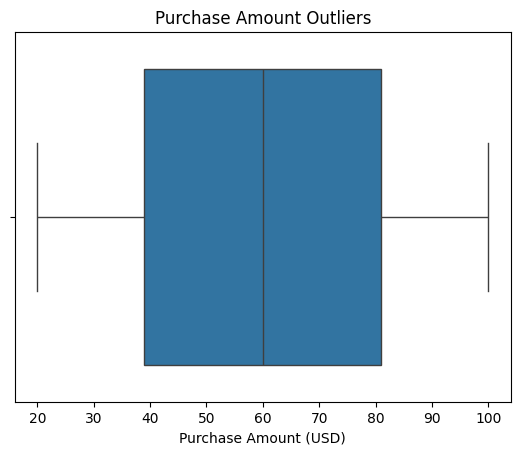

In [15]:
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Purchase Amount Outliers')
plt.show()


In [16]:
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [17]:
df.groupby('Discount Applied')['Purchase Amount (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Discount Applied,,,,,,,,
0,2223.0,60.130454,23.740327,20.0,39.0,60.0,81.0,100.0
1,1677.0,59.279070,23.610697,20.0,38.0,60.0,80.0,100.0


In [18]:
df['Customer ID'].nunique()

3900

In [19]:
print("Average Age:", round(df['Age'].mean(), 2))

Average Age: 44.07


In [20]:
print("Average Spending ($):", round(df['Purchase Amount (USD)'].mean(), 2))

Average Spending ($): 59.76


In [21]:
print("Average Review Rating:", round(df['Review Rating'].mean(), 2))

Average Review Rating: 3.75


In [22]:
print(df['Gender'].value_counts(normalize=True) * 100)

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64


In [23]:
gender_spending = df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count']).round(2)
print("Spending Summary by Gender:")
print(gender_spending)

Spending Summary by Gender:
         mean     sum  count
Gender                      
Female  60.25   75191   1248
Male    59.54  157890   2652


In [24]:
print("Age Statistics:", df['Age'].describe().round(2))

Age Statistics: count    3900.00
mean       44.07
std        15.21
min        18.00
25%        31.00
50%        44.00
75%        57.00
max        70.00
Name: Age, dtype: float64


In [25]:
print("Purchase Amount Summary:" ,df['Purchase Amount (USD)'].describe().round(2))

Purchase Amount Summary: count    3900.00
mean       59.76
std        23.69
min        20.00
25%        39.00
50%        60.00
75%        81.00
max       100.00
Name: Purchase Amount (USD), dtype: float64


In [26]:
df["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [27]:
print("Top Product Categories:")
print(df['Category'].value_counts())

Top Product Categories:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [28]:
df["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [29]:
print("Top 10 Purchased Items:")
print(df['Item Purchased'].value_counts().head(10))

Top 10 Purchased Items:
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64


In [30]:
df['Color'].value_counts().head(10)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


In [31]:
df['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [32]:
df.groupby('Season')['Purchase Amount (USD)'].mean().round(2)

,Purchase Amount (USD)
Season,
Fall,61.56
Spring,58.74
Summer,58.41
Winter,60.36


In [33]:
# Discount Usage (%):
df['Discount Applied'].value_counts(normalize=True) * 100

,proportion
Discount Applied,
0,57.0
1,43.0


In [34]:
# Promo Code Usage (%):
df['Promo Code Used'].value_counts(normalize=True) * 100

,proportion
Promo Code Used,
0,57.0
1,43.0


In [35]:
discount_promo_summary = df.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].mean().round(2)
discount_promo_summary

,,Purchase Amount (USD)
Discount Applied,Promo Code Used,
0,0,60.13
1,1,59.28


In [36]:
df["Payment Method"].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [37]:
df['Payment Method'].value_counts()

,count
Payment Method,
Credit Card,696
Venmo,653
Cash,648
PayPal,638
Debit Card,633
Bank Transfer,632


In [38]:
df['Shipping Type'].value_counts()

,count
Shipping Type,
Free Shipping,675
Standard,654
Store Pickup,650
Next Day Air,648
Express,646
2-Day Shipping,627


In [39]:
summary = df.groupby('Subscription Status')[['Previous Purchases', 'Purchase Amount (USD)']].mean().round(2)
summary.index = summary.index.map({0: 'Not Subscribed', 1: 'Subscribed'})
summary

,Previous Purchases,Purchase Amount (USD)
Subscription Status,,
Not Subscribed,25.08,59.87
Subscribed,26.08,59.49


In [40]:
df['Location'].value_counts().head(10)

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


# Visualization

In [41]:
signature_palette = [
    "#FFB6B9", "#FAE3D9", "#BBDED6",
    "#8AC6D1", "#F6EAC2", "#F2A7A0"
]

sns.set_palette(signature_palette)
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


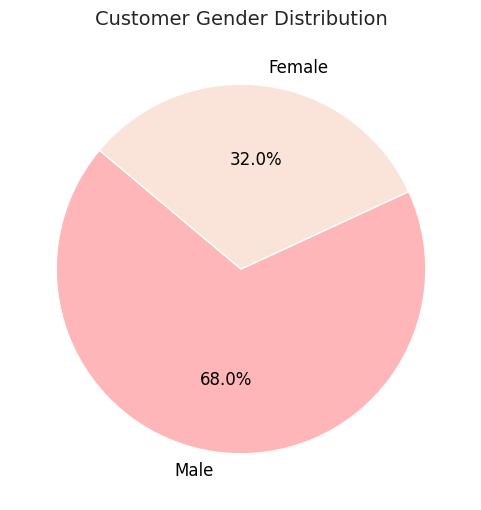

In [42]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=signature_palette,
    textprops={'fontsize': 12, 'color': 'black'}
)
plt.title("Customer Gender Distribution", fontsize=14, pad=10)
plt.show()

/tmp/ipython-input-3488117659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette=signature_palette)
/tmp/ipython-input-3488117659.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette=signature_palette)


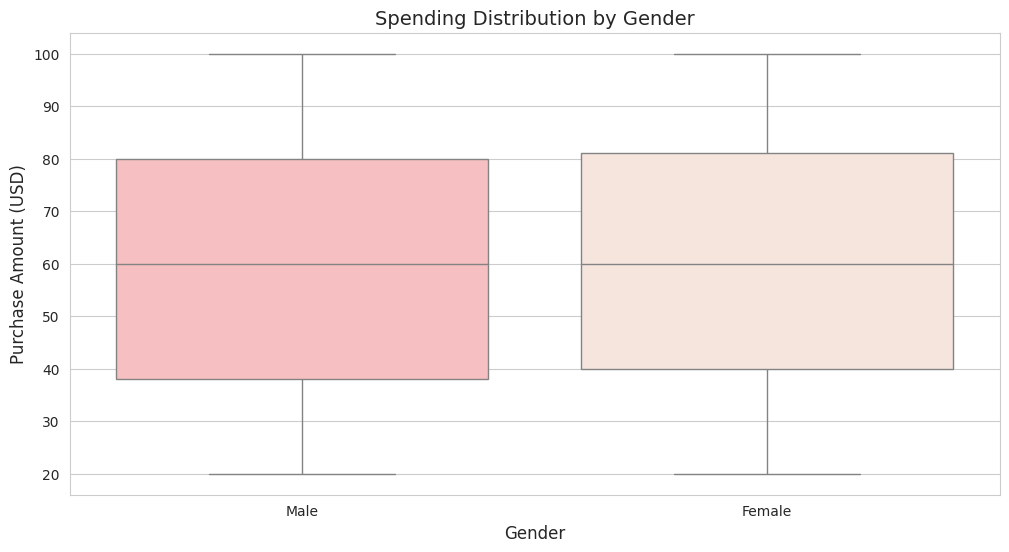

In [43]:
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette=signature_palette)
plt.title("Spending Distribution by Gender")
plt.show()

<Axes: xlabel='Category', ylabel='count'>

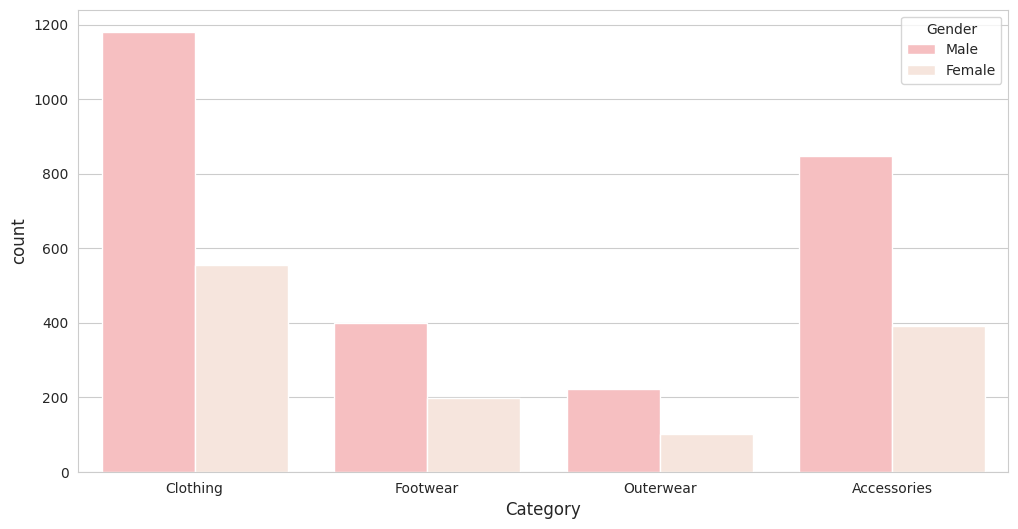

In [44]:
sns.countplot(data=df, x='Category', hue='Gender')

/tmp/ipython-input-3612802652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Frequency of Purchases', palette=signature_palette)
/tmp/ipython-input-3612802652.py:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Frequency of Purchases', palette=signature_palette)


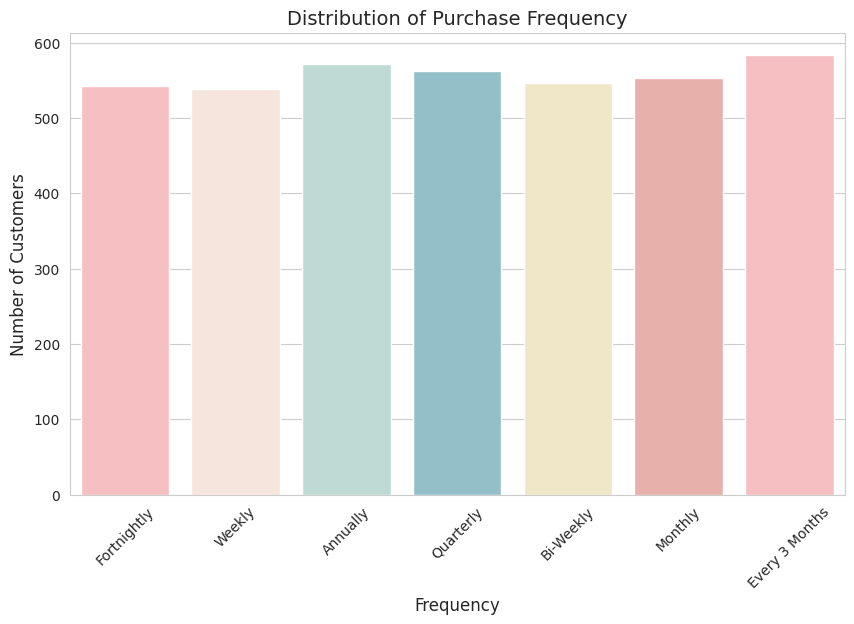

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency of Purchases', palette=signature_palette)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Subscription Status')

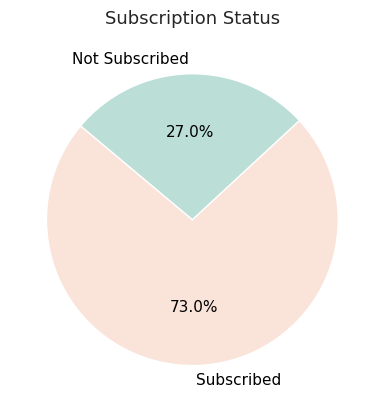

In [46]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,2)
sub_counts = df['Subscription Status'].value_counts()
plt.pie(
    sub_counts,
    labels=['Subscribed', 'Not Subscribed'],
    autopct='%1.1f%%',
    startangle=140,
    colors=[signature_palette[1], signature_palette[2]],
    textprops={'fontsize': 11, 'color': 'black'}
)
plt.title("Subscription Status", fontsize=13, pad=10)


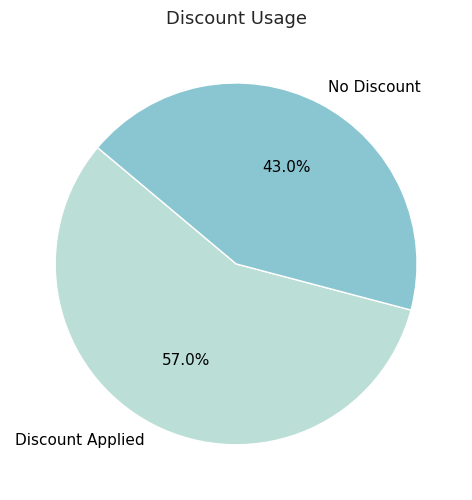

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,3)
discount_counts = df['Discount Applied'].value_counts()
plt.pie(
    discount_counts,
    labels=['Discount Applied', 'No Discount'],
    autopct='%1.1f%%',
    startangle=140,
    colors=[signature_palette[2], signature_palette[3]],
    textprops={'fontsize': 11, 'color': 'black'}
)
plt.title("Discount Usage", fontsize=13, pad=10)

plt.tight_layout()
plt.show()

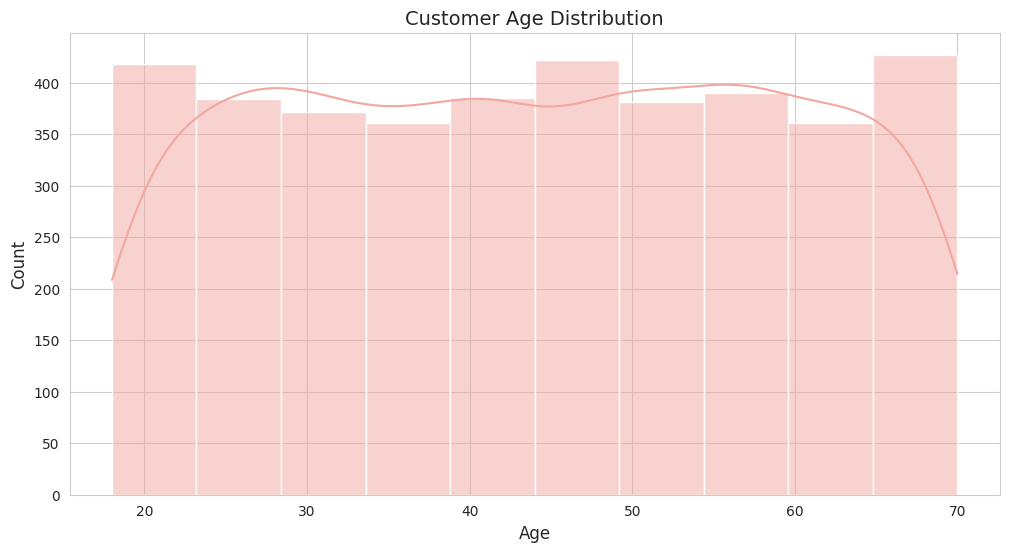

In [48]:
sns.histplot(df['Age'], bins=10, color=signature_palette[5], kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1494115476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette=signature_palette)
/tmp/ipython-input-1494115476.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='Gender', y='Age', data=df, palette=signature_palette)


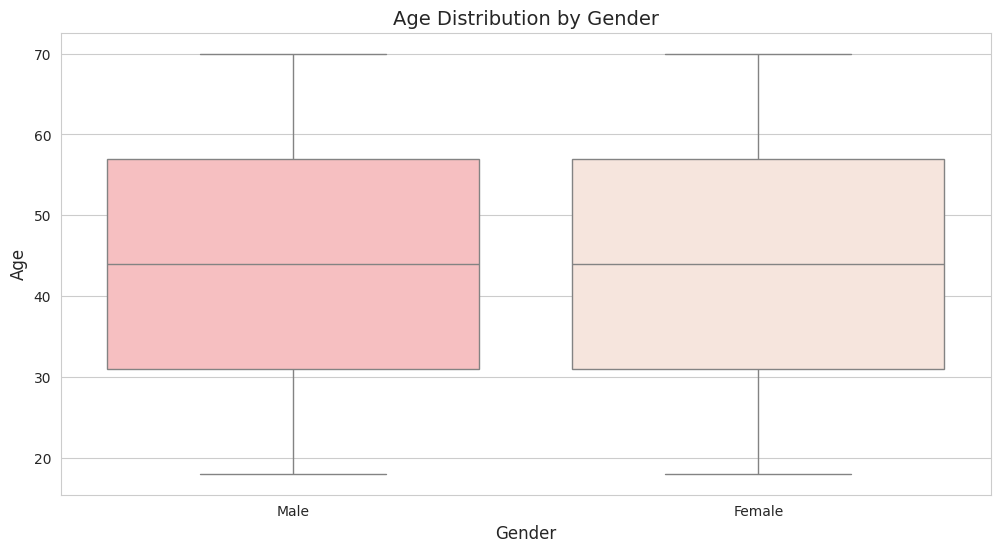

In [49]:
sns.boxplot(x='Gender', y='Age', data=df, palette=signature_palette)
plt.title("Age Distribution by Gender")
plt.show()

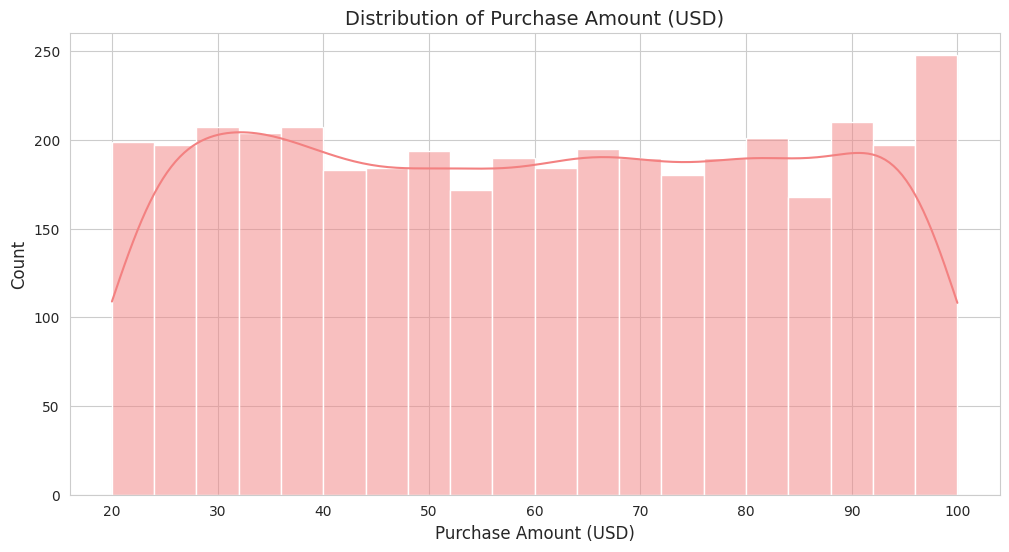

In [50]:
sns.histplot(df['Purchase Amount (USD)'], bins=20, color="#F38181", kde=True)
plt.title("Distribution of Purchase Amount (USD)")
plt.show()

/tmp/ipython-input-1085717490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, palette=signature_palette)
/tmp/ipython-input-1085717490.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, palette=signature_palette)


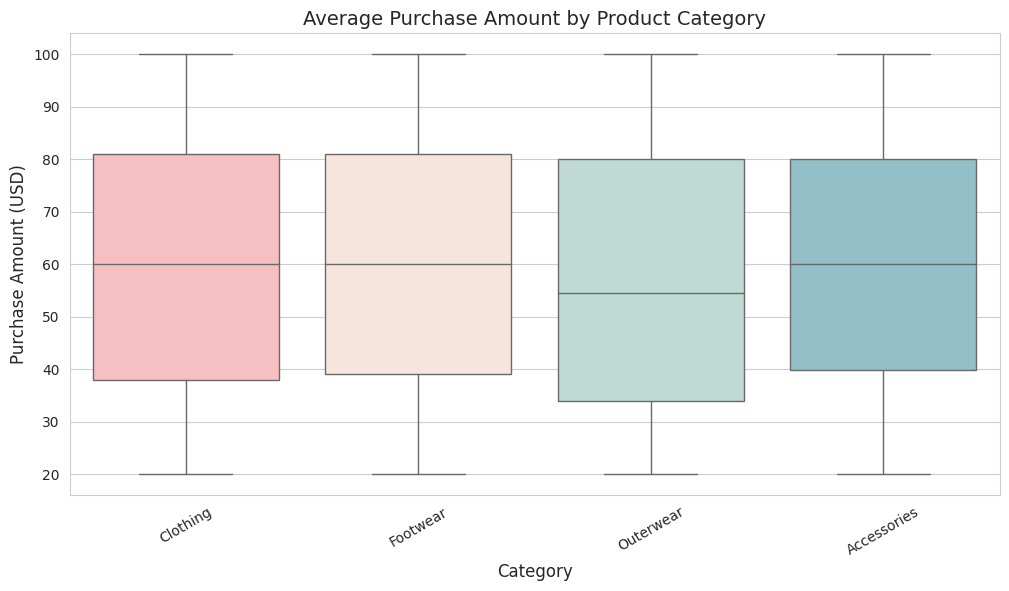

In [51]:
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, palette=signature_palette)
plt.title("Average Purchase Amount by Product Category")
plt.xticks(rotation=30)
plt.show()

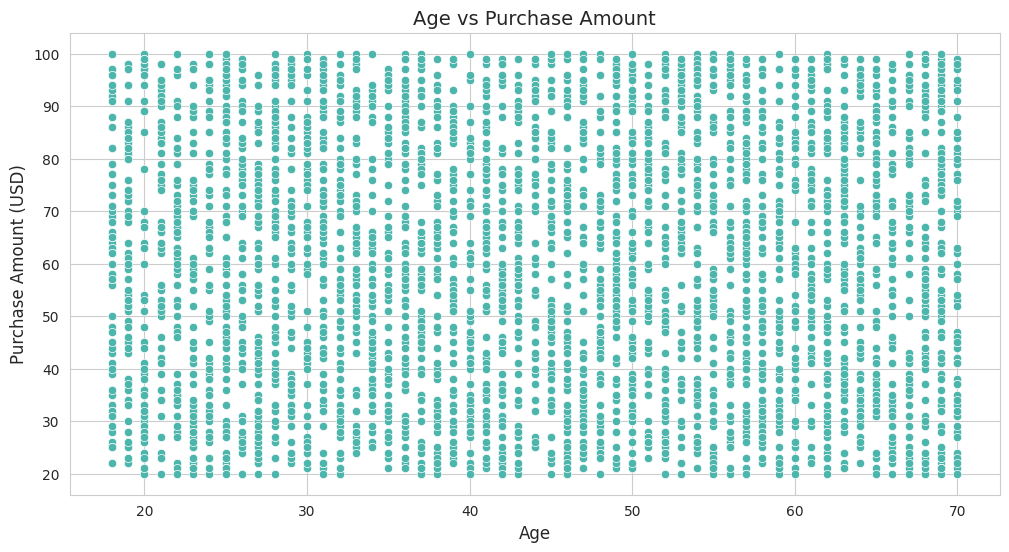

In [52]:
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df, color="#4DB6AC")
plt.title("Age vs Purchase Amount")
plt.show()

/tmp/ipython-input-3304628498.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette=signature_palette)
/tmp/ipython-input-3304628498.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='Category', data=df, palette=signature_palette)


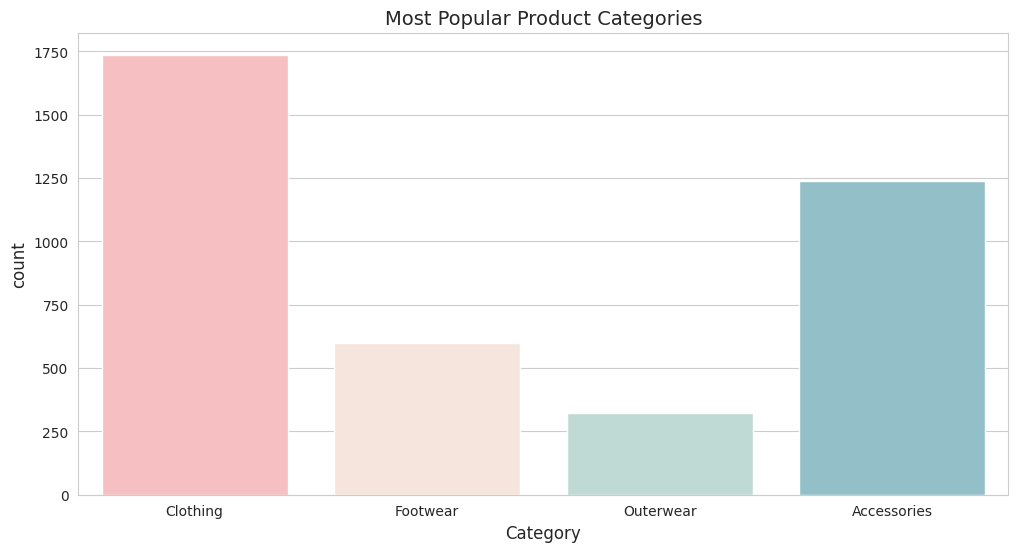

In [53]:
sns.countplot(x='Category', data=df, palette=signature_palette)
plt.title("Most Popular Product Categories")
plt.show()

/tmp/ipython-input-1329661523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='mean', data=gender_summary, palette=signature_palette)
/tmp/ipython-input-1329661523.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='Gender', y='mean', data=gender_summary, palette=signature_palette)


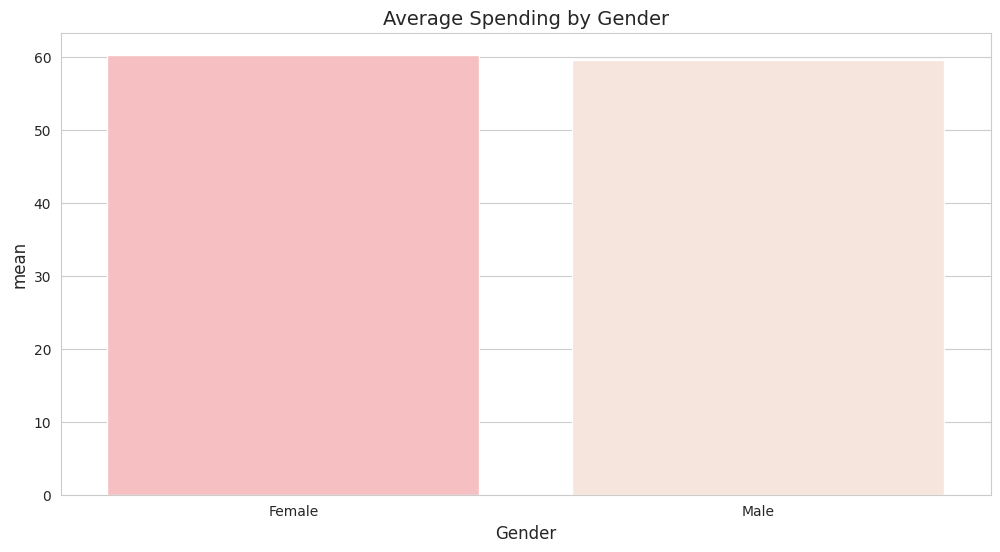

In [54]:
gender_summary = df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count']).reset_index()
sns.barplot(x='Gender', y='mean', data=gender_summary, palette=signature_palette)
plt.title("Average Spending by Gender")
plt.show()

/tmp/ipython-input-1644919099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1644919099.py:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


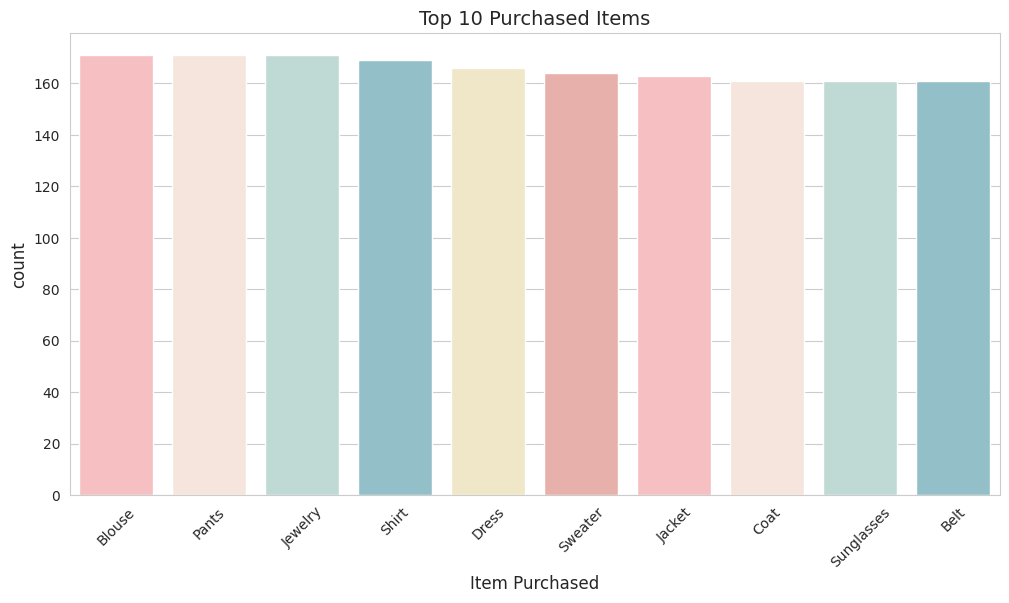

In [55]:
top_items = df['Item Purchased'].value_counts().head(10).index

sns.countplot(
    x='Item Purchased',
    data=df[df['Item Purchased'].isin(top_items)],
    palette=signature_palette,
    order=top_items
)

plt.title("Top 10 Purchased Items")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1178327441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Size', data=df, palette=signature_palette)
/tmp/ipython-input-1178327441.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='Size', data=df, palette=signature_palette)


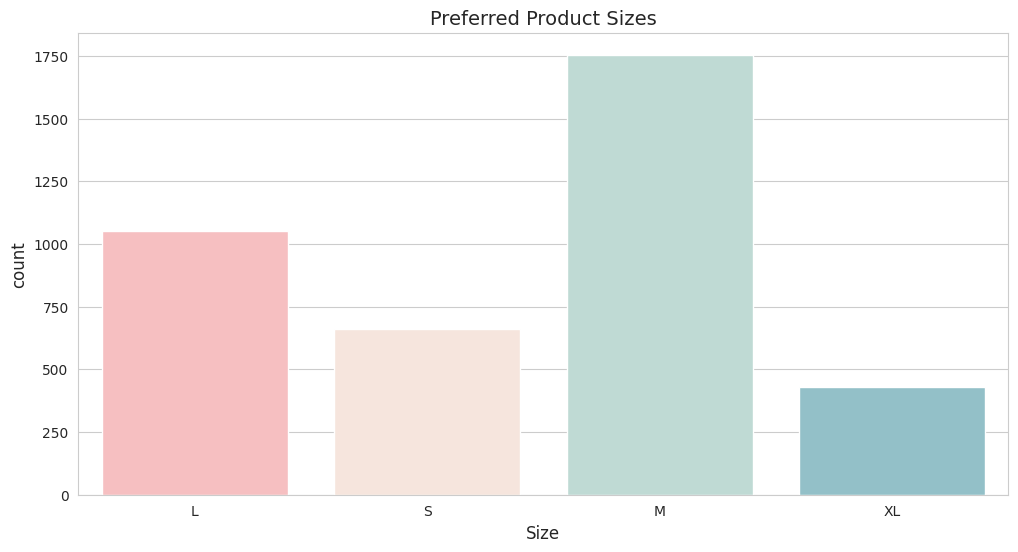

In [56]:
sns.countplot(x='Size', data=df, palette=signature_palette)
plt.title("Preferred Product Sizes")
plt.show()

/tmp/ipython-input-2754417602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-2754417602.py:2: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


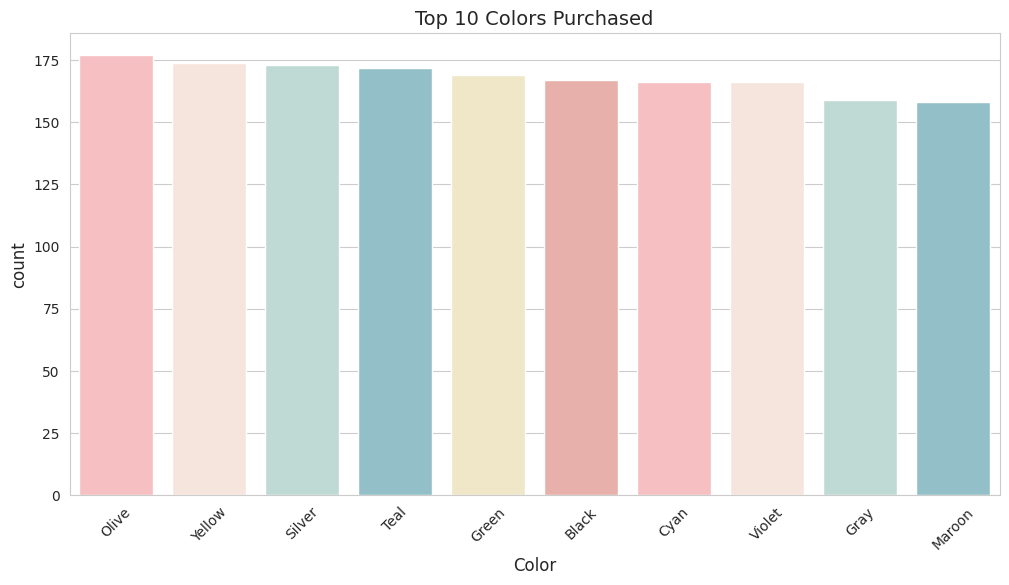

In [57]:
top_colors = df['Color'].value_counts().head(10).index
sns.countplot(
    x='Color',
    data=df[df['Color'].isin(top_colors)],
    palette=signature_palette,
    order=top_colors
)
plt.title("Top 10 Colors Purchased")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3947467667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Sales Count', data=season_counts, palette=signature_palette)
/tmp/ipython-input-3947467667.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(x='Season', y='Sales Count', data=season_counts, palette=signature_palette)


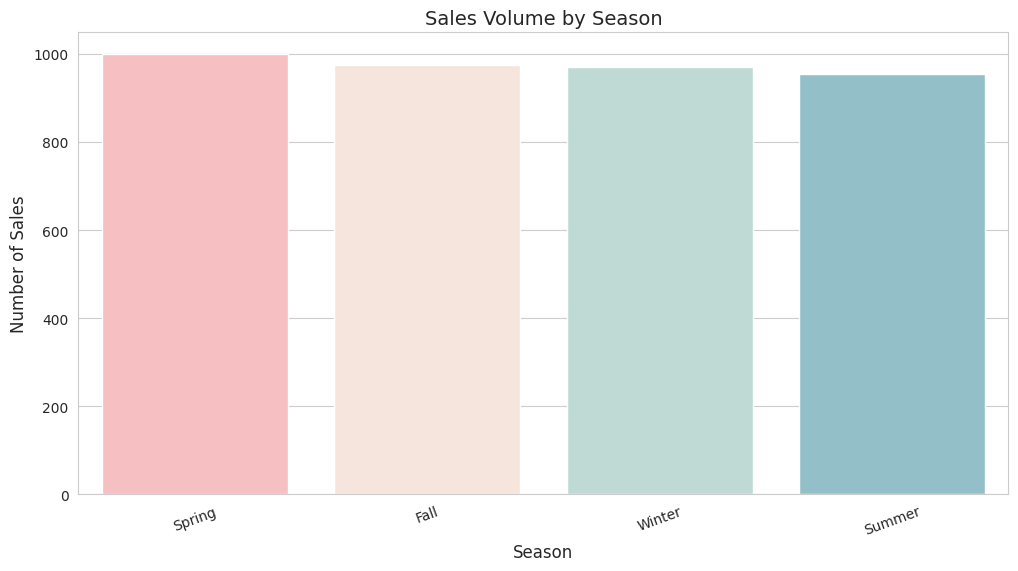

In [58]:
season_counts = df['Season'].value_counts().reset_index()
season_counts.columns = ['Season', 'Sales Count']

sns.barplot(x='Season', y='Sales Count', data=season_counts, palette=signature_palette)
plt.title("Sales Volume by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Number of Sales")
plt.xticks(rotation=20)
plt.show()


/tmp/ipython-input-3147290008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_sales, palette=signature_palette)
/tmp/ipython-input-3147290008.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_sales, palette=signature_palette)


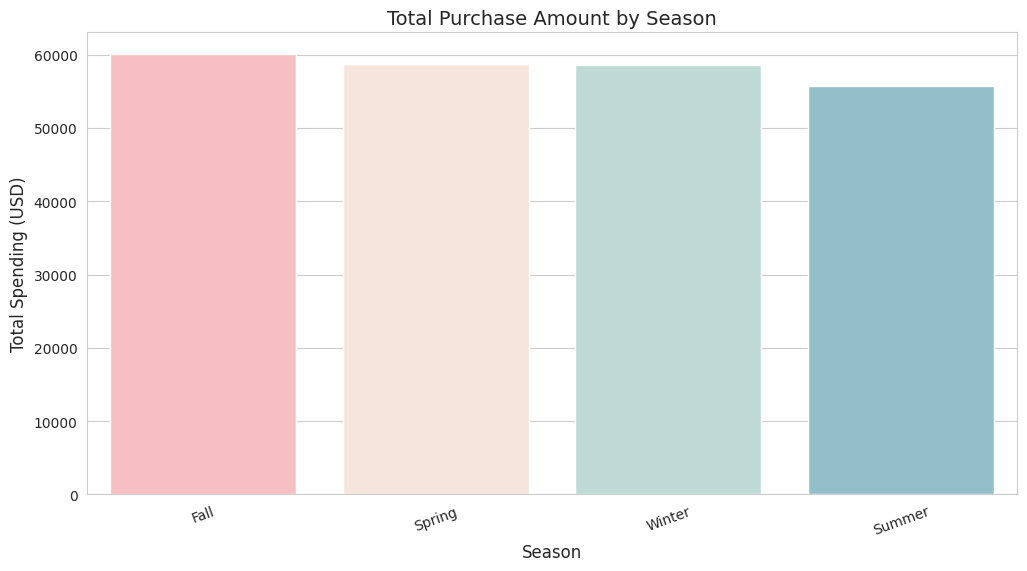

In [59]:
season_sales = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_sales, palette=signature_palette)
plt.title("Total Purchase Amount by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=20)
plt.show()

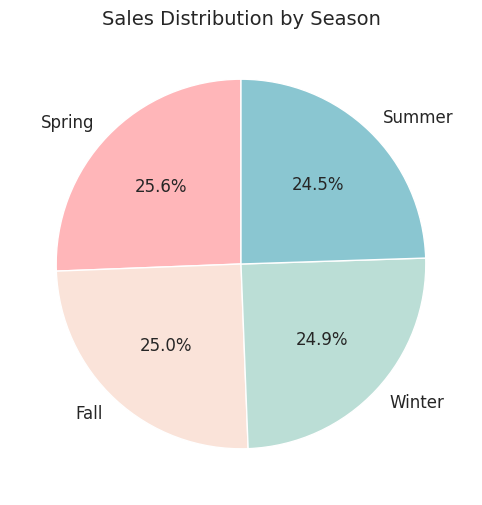

In [60]:
season_counts = df['Season'].value_counts()

plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=signature_palette, textprops={'fontsize': 12})
plt.title("Sales Distribution by Season", fontsize=14)
plt.show()


/tmp/ipython-input-4060454413.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='Season', hue='Category', data=df, palette=signature_palette)


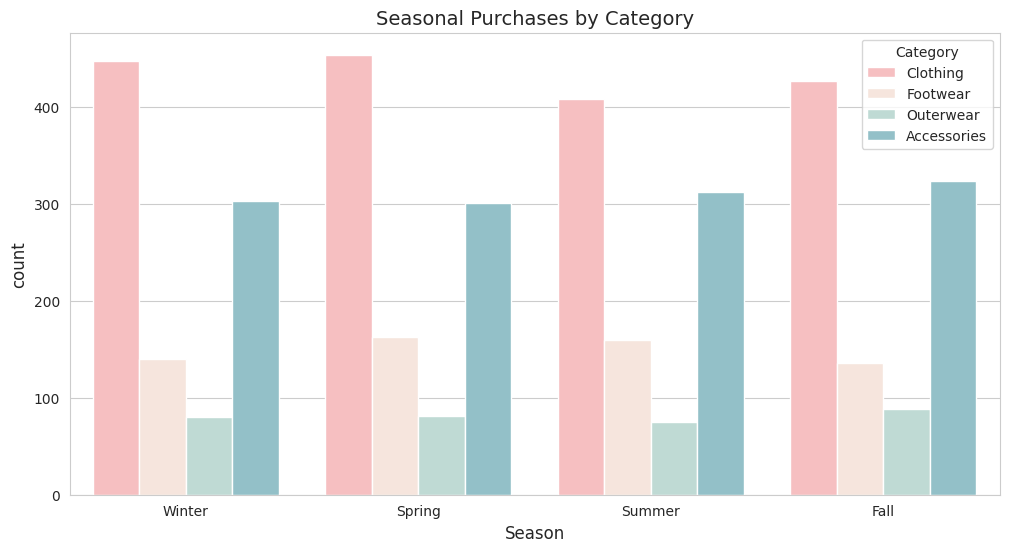

In [61]:
sns.countplot(x='Season', hue='Category', data=df, palette=signature_palette)
plt.title("Seasonal Purchases by Category")
plt.show()

/tmp/ipython-input-2304919392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette=signature_palette)
/tmp/ipython-input-2304919392.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette=signature_palette)


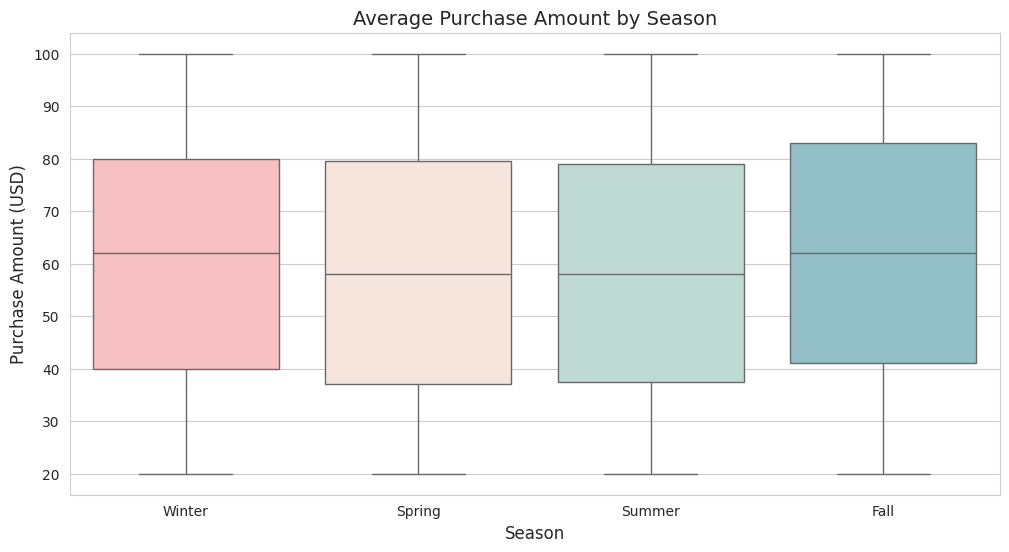

In [62]:
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette=signature_palette)
plt.title("Average Purchase Amount by Season")
plt.show()

/tmp/ipython-input-1875198527.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1875198527.py:11: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(
/tmp/ipython-input-1875198527.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1875198527.py:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(


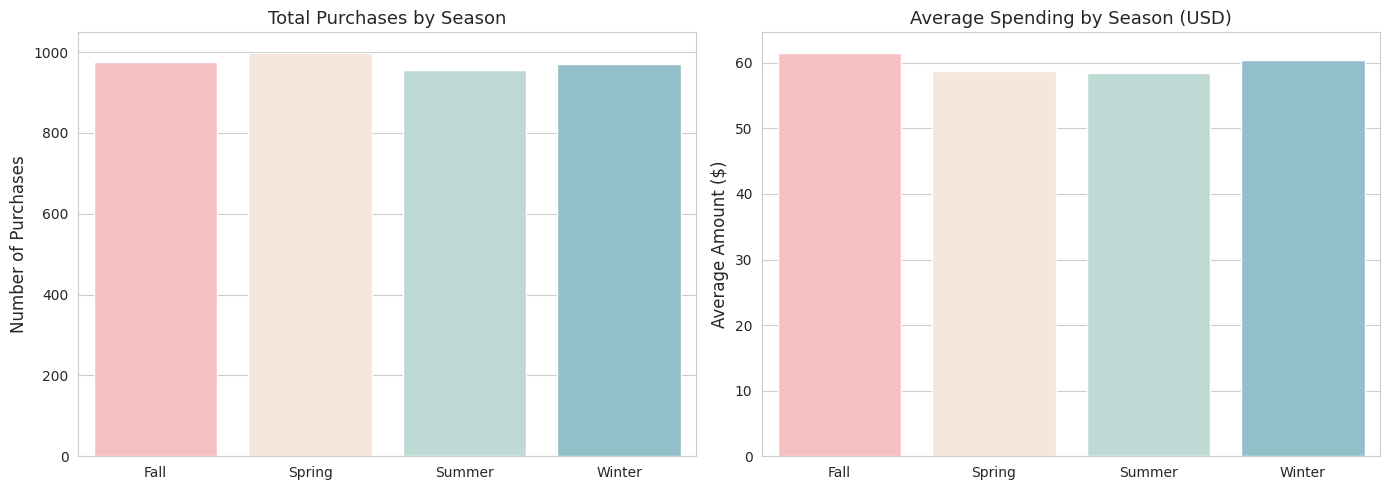

In [63]:
season_summary = (
    df.groupby('Season')
    .agg({'Purchase Amount (USD)': ['count', 'mean']})
    .reset_index()
)
season_summary.columns = ['Season', 'Total Purchases', 'Average Spending']

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#1
sns.barplot(
    x='Season',
    y='Total Purchases',
    data=season_summary,
    palette=signature_palette,
    ax=ax[0]
)
ax[0].set_title("Total Purchases by Season", fontsize=13)
ax[0].set_xlabel("")
ax[0].set_ylabel("Number of Purchases")

#2
sns.barplot(
    x='Season',
    y='Average Spending',
    data=season_summary,
    palette=signature_palette,
    ax=ax[1]
)
ax[1].set_title("Average Spending by Season (USD)", fontsize=13)
ax[1].set_xlabel("")
ax[1].set_ylabel("Average Amount ($)")

plt.tight_layout()
plt.show()

/tmp/ipython-input-2492882777.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


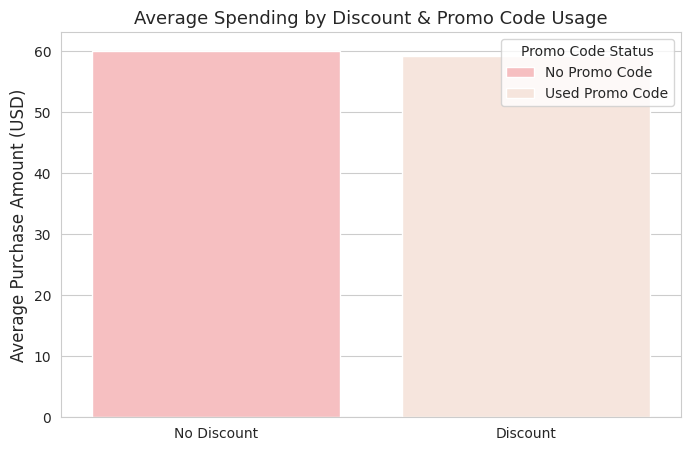

In [64]:
summary = df.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].mean().reset_index()

summary['Discount Applied'] = summary['Discount Applied'].map({0: 'No Discount', 1: 'Discount'})
summary['Promo Code Used'] = summary['Promo Code Used'].map({0: 'No Promo Code', 1: 'Used Promo Code'})

plt.figure(figsize=(8,5))
sns.barplot(
    data=summary,
    x='Discount Applied',
    y='Purchase Amount (USD)',
    hue='Promo Code Used',
    palette=signature_palette
)
plt.title("Average Spending by Discount & Promo Code Usage", fontsize=13)
plt.ylabel("Average Purchase Amount (USD)")
plt.xlabel("")
plt.legend(title="Promo Code Status")
plt.show()

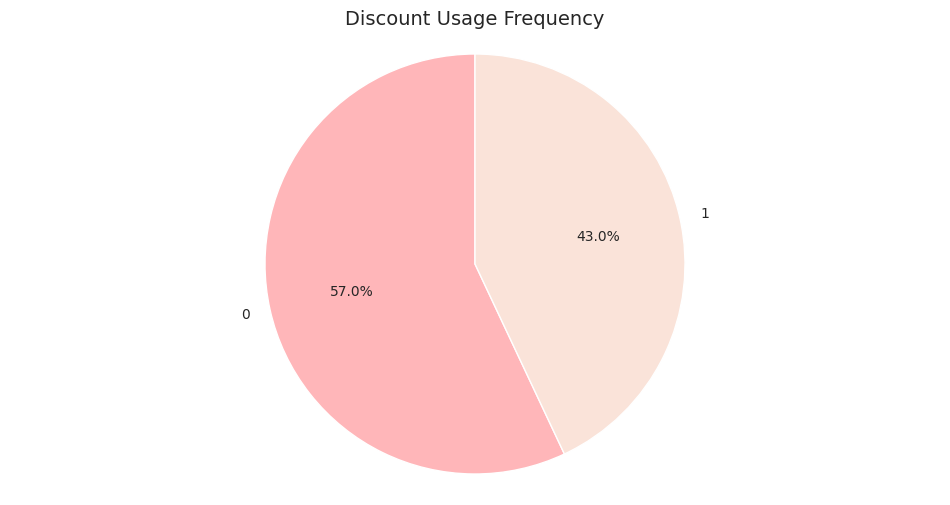

In [65]:
discount_counts = df['Discount Applied'].value_counts()

labels = discount_counts.index
sizes = discount_counts.values
colors = signature_palette
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Discount Usage Frequency")
plt.axis('equal')
plt.show()

/tmp/ipython-input-2968974543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo Code Used', data=df, palette=signature_palette)
/tmp/ipython-input-2968974543.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Promo Code Used', data=df, palette=signature_palette)


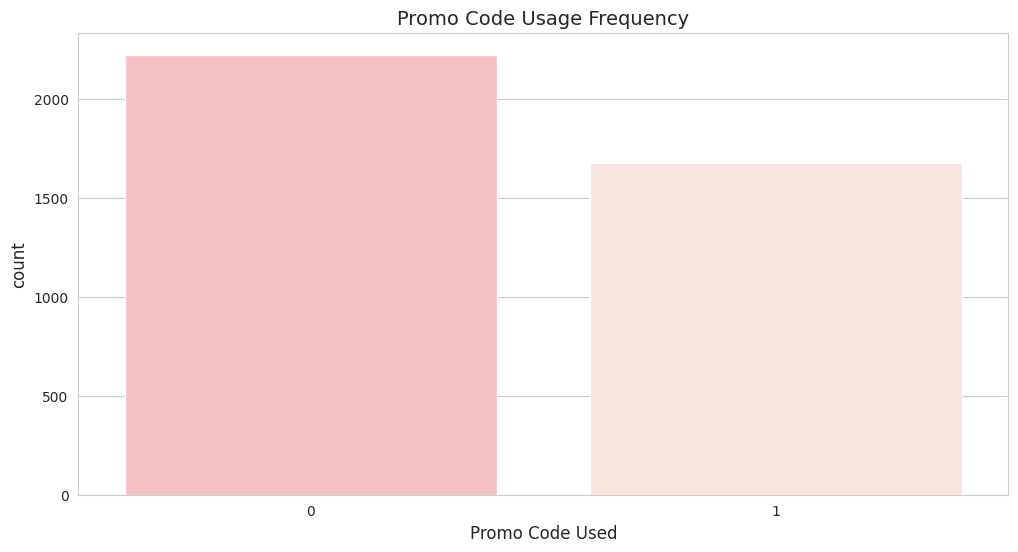

In [66]:
sns.countplot(x='Promo Code Used', data=df, palette=signature_palette)
plt.title("Promo Code Usage Frequency")
plt.show()

/tmp/ipython-input-2824723609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-2824723609.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


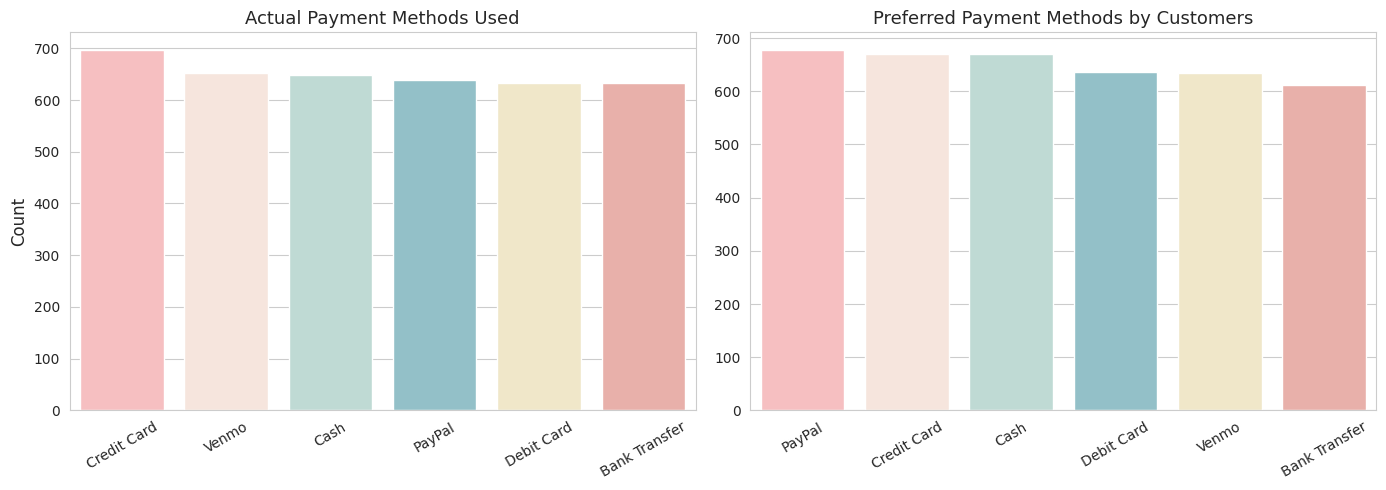

In [67]:
payment_method_order = df['Payment Method'].value_counts().index
preferred_payment_order = df['Preferred Payment Method'].value_counts().index

plt.figure(figsize=(14,5))

# Payment Method (Actual usage)
plt.subplot(1,2,1)
sns.countplot(
    x='Payment Method',
    data=df,
    order=payment_method_order,
    palette=signature_palette
)
plt.title("Actual Payment Methods Used", fontsize=13)
plt.xticks(rotation=30)
plt.xlabel("")
plt.ylabel("Count")

# Preferred Payment Method (Customer preference)
plt.subplot(1,2,2)
sns.countplot(
    x='Preferred Payment Method',
    data=df,
    order=preferred_payment_order,
    palette=signature_palette
)
plt.title("Preferred Payment Methods by Customers", fontsize=13)
plt.xticks(rotation=30)
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()


/tmp/ipython-input-2532022535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


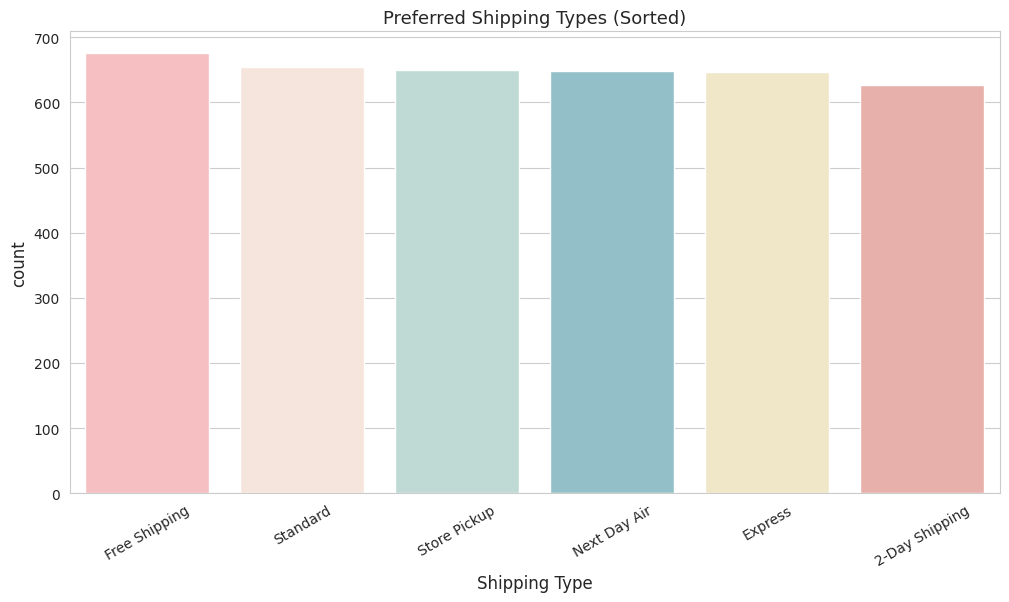

In [68]:
order = df['Shipping Type'].value_counts().index
sns.countplot(
    x='Shipping Type',
    data=df,
    order=order,
    palette=signature_palette
)
plt.title("Preferred Shipping Types (Sorted)", fontsize=13)
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-1243270688.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


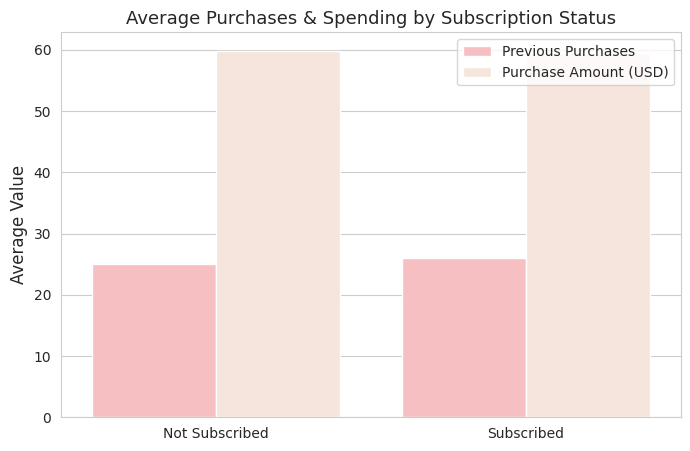

In [69]:
summary = df.groupby('Subscription Status')[['Previous Purchases', 'Purchase Amount (USD)']].mean().reset_index()
summary['Subscription Status'] = summary['Subscription Status'].map({0: 'Not Subscribed', 1: 'Subscribed'})
summary_melted = summary.melt(id_vars='Subscription Status', var_name='Metric', value_name='Average')

plt.figure(figsize=(8,5))
sns.barplot(
    data=summary_melted,
    x='Subscription Status',
    y='Average',
    hue='Metric',
    palette=signature_palette
)
plt.title("Average Purchases & Spending by Subscription Status", fontsize=13)
plt.xlabel("")
plt.ylabel("Average Value")
plt.legend(title="")
plt.show()

/tmp/ipython-input-510456050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette=signature_palette)
/tmp/ipython-input-510456050.py:2: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_locations.index, y=top_locations.values, palette=signature_palette)


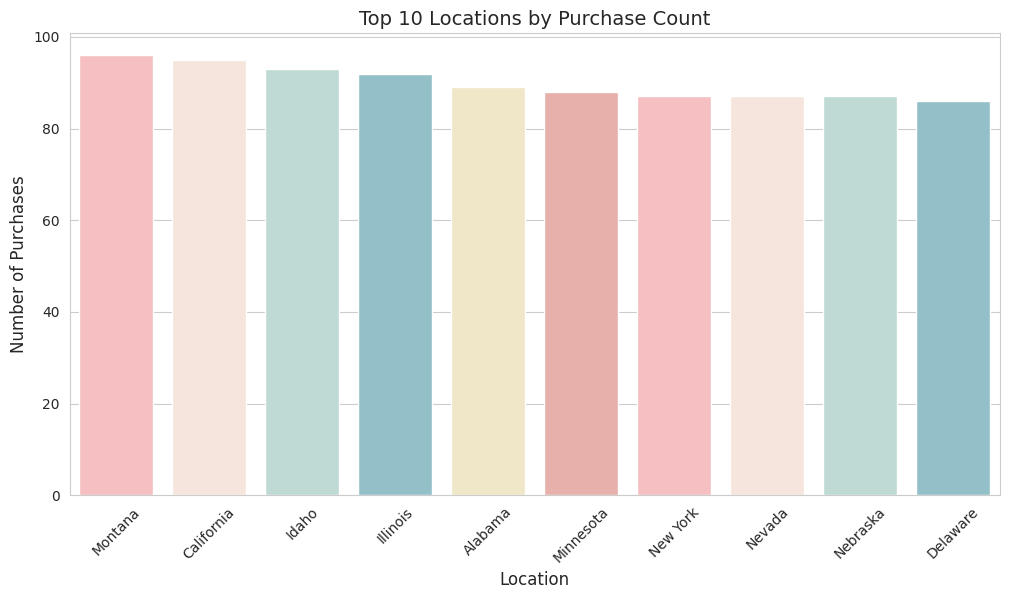

In [70]:
top_locations = df['Location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette=signature_palette)
plt.title("Top 10 Locations by Purchase Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Purchases")
plt.show()

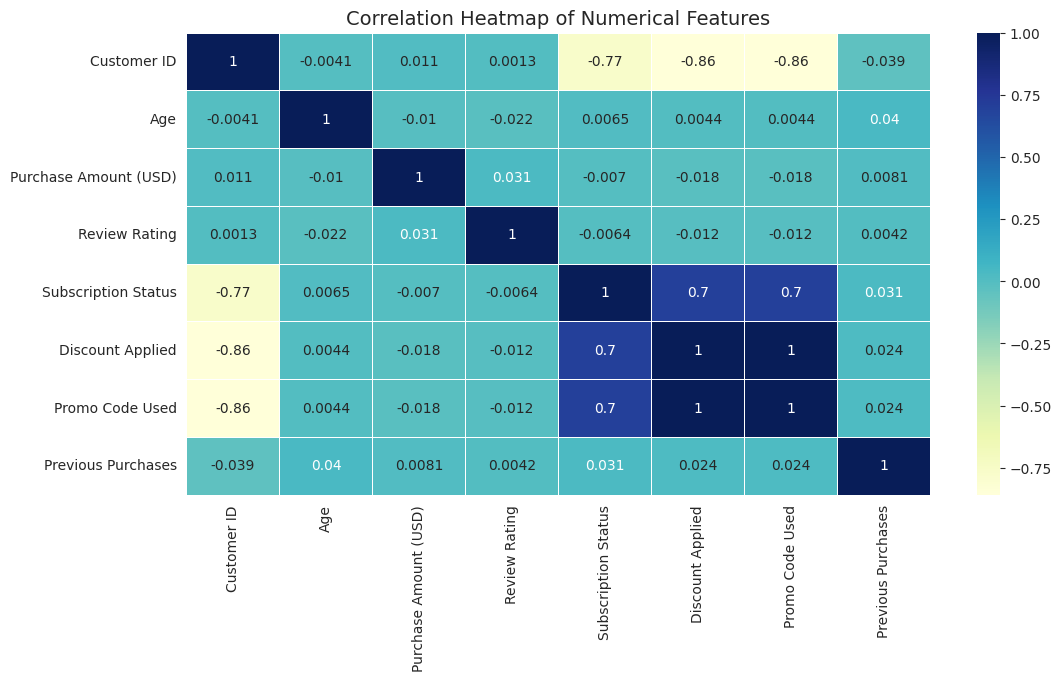

In [71]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()